![](../images/26-weeks-of-data-science-banner.jpg)

<h1 align="center"> Recommender Systems<h1/>

## Program so far
- Linear Regression 
- Logistic Regression
- Tree Based Methods
- Time Series 
- Natural Language Processing

## What are we going to learn today? 
- What is Recommendation System
- The long tail
- A simple Popularity based Recommender system
- A Collaborative Filtering Model
- Evaluating a Recommendation system

Let's get started!!

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## So whats a recommender system?
***
A recommender system or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" that a user would give to an item. Lets consider an example shown in the figure below. Here we have a user database i.e data consisting of items rated by the user. Now lets suppose that a new user visits and likes 5 out of 10 items in the website. Then a recommender system recommends the items the new user might like based on similarity with other items. We shall get to this concept below. 

![recommender_system_info.jpg](../images/recommender_system_info.jpg)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## The theory of long tail
***


- It shows how products in low demand or with low sales volume can collectively make up a market share that rivals or exceeds the relatively few current bestsellers and blockbusters but only if the store or distribution channel is large enough.

- The long tail concept looks at less popular goods in lower demand and use of  these goods could increase in 
  profitability because consumers are navigating away from mainstream markets.
  
- This can be easily understood by looking at the figure [below](https://www.wired.com/2004/10/tail/). 

![longtail.png](../images/longtail.png)

The figure above clearly shows the use of longtail by [Rhapsody](https://en.wikipedia.org/wiki/Rhapsody_(music) where they sell Music albums both online and off line. We can clearly observe the following.

- Both Rhapsody and Wal-Mart sell the most popular music albums online. But the former offers 19 times more songs than Wal-Mart. Even though there is a demand for the popular music albums there is also a demand for the less popular online. Recommender systems leverage these less popular items online. 

## Recommend the most popular items

- Let's consider the movies dataset. We look carefully at the user ratings and think what can be done? 

- The answer that strikes first is the most **popular Item**. This is exactly what we will be doing. 

- Technically this is super fast but is does come with a major drawback which is lack of personalization. The dataset that has many files but we will be looking at a few of these files mainly the ones which relate to movie ratings.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Popularity based recommender system
***
In this approach we recommend items which are liked by most number of users. This is a blazing fast and dirty approach and thus has a major drawback. The things is, there is no personalization involved with this approach. Such methods are widely used in news portals and work effectively because of the following points

- There is division by section so user can look at the section of his interest.
- At a time there are only a few hot topics and there is a high chance that a user wants to read the news which is being read by most others

In [ ]:
import pandas as pd
import os, io
import numpy as np
from pandas import Series, DataFrame, read_table
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

We start to explore the data set of movie ratings and particularly our interest lies in ratings. Let's see how we recommend the most popular (i.e highly rated) movies.

In [ ]:
## Load the Ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = read_table('../data/ml-100k//u.data',header=None,sep='\t')
ratings.columns = r_cols

i_cols = ['movie_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = read_table('../data/ml-100k//u.item', sep='|',names=i_cols,
 encoding='latin-1')

In [ ]:
ratings.head()

## Let's build a popularity based recommender system


With our initial exploration, we decide that ideal data would be the one were we could also have the movie ratings with us. Let's see how are we able to do this.

In [ ]:
new_data = pd.merge(items,ratings,on='movie_id')
new_data  = new_data[['movie_id','movie title','user_id','rating']]

In [6]:
new_data.head()

movie_id       movie title  user_id  rating
0         1  Toy Story (1995)      308       4
1         1  Toy Story (1995)      287       5
2         1  Toy Story (1995)      148       4
3         1  Toy Story (1995)      280       4
4         1  Toy Story (1995)       66       3

Before proceeding to build the recommender system, we will observe the following steps to recommend movies.
- Find the unique users
- Count the number of times the movie has been seen.
- [Rank](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rank.html) the scores (counts) 

In [7]:
def popularity(train,title,ids):
    train_data_grouped = train.groupby([title])[ids].count().reset_index()  #user_id  #movie title
    train_data_grouped.rename(columns = {ids: 'score'},inplace=True)            
    train_data_sort = train_data_grouped.sort_values(['score',title], ascending = [0,1])
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    popularity_recommendations = train_data_sort.head(10) 
    return popularity_recommendations

In [8]:
popularity(new_data,'movie title','user_id')

movie title  score  Rank
1398               Star Wars (1977)    584   1.0
333                  Contact (1997)    509   2.0
498                    Fargo (1996)    508   3.0
1234      Return of the Jedi (1983)    507   4.0
860                Liar Liar (1997)    485   5.0
460     English Patient, The (1996)    481   6.0
1284                  Scream (1996)    478   7.0
1523               Toy Story (1995)    452   8.0
32             Air Force One (1997)    431   9.0
744   Independence Day (ID4) (1996)    429  10.0

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Pandas rank
- Compute numerical data ranks (1 through n) along axis. Equal values are assigned a rank that is the average of the ranks of those values. This is taken from the official [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rank.html)

## Shortcomings

Having recommended the movies, we can immediately conclude that, the major drawback of such a system **Lack of Personalization**

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Collaborative Filtering
****

In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

![Collaborative_filtering.gif](../images/Collaborative_filtering.gif)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Types of Collaborative Filtering.
***
## User Based Collaborative Filtering

Here we find look alike customers (based on similarity) and offer products which first customer’s look alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every customer pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

1. Build a matrix of things each user bought viewed rated
2. compute similarity scores between users
3. find users similar to you
4. Recommend stuff they bought/viewed/rated that you haven’t yet

## Problems 
1. People fickle, tastes change
2. They are usually many more people than things
3. People do bad things

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Item Based Collaborative Filtering
***
 It is quite similar to previous algorithm, but instead of finding customer look alike, we try finding item look alike. Once we have item look alike matrix, we can easily recommend alike items to customer who have purchased any item from the store. This algorithm is far less resource consuming than user-user collaborative filtering. 

1. Find every pair of movies that were watched by the same person
2. Measure the similarity of rating across all the users who watched both
3. Sort movie then by similarity strength


## Interesting fact 

Item- Item Collaboration is extensively used in amazon and they came out with it in great detail. You can read more at [amazon](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf)

----------
Lets get started with building our Item based collaborative recommender system. For convenience Lets split this up into two parts. 

- To find Similarities between items
- To Recommend them to users

Item based Collaborative filtering would be the most feasible solution as the number of items is always less than the number of users and it improves computational speed.

**Here we will leverage the power of pandas** 

- To begin we will use the pandas pivot table to look at relationships between movies and we will use the pivot table in pandas

- We start building a utility matrix (matrix consisting of movies and ratings) 

In [9]:
movie_ratings = new_data.pivot_table(index=['user_id'],columns=['movie title'],values='rating')

In [10]:
movie_ratings.head()

movie title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
0                                  NaN           NaN                    NaN   
1                                  NaN           NaN                    2.0   
2                                  NaN           NaN                    NaN   
3                                  NaN           NaN                    NaN   
4                                  NaN           NaN                    NaN   

movie title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                     
0                            NaN         NaN                          NaN   
1                            5.0         NaN                          NaN   
2                            NaN         NaN                          NaN   
3                            NaN         2.0                          NaN   
4                            NaN         NaN                          NaN   

movie title  20,000 Leagues Under the Sea (1954)  \
user_id                                            
0                                            NaN   
1                                            3.0   
2                                            NaN   
3                                            NaN   
4                                            NaN   

movie title  2001: A Space Odyssey (1968)  \
user_id                                     
0                                     NaN   
1                                     4.0   
2                                     NaN   
3                                     NaN   
4                                     NaN   

movie title  3 Ninjas: High Noon At Mega Mountain (1998)  \
user_id                                                    
0                                                    NaN   
1                                                    NaN   
2                                                    1.0   
3                                                    NaN   
4                                                    NaN   

movie title  39 Steps, The (1935)                 ...                  \
user_id                                           ...                   
0                             NaN                 ...                   
1                             NaN                 ...                   
2                             NaN                 ...                   
3                             NaN                 ...                   
4                             NaN                 ...                   

movie title  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id                                                     
0                           NaN                       NaN   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   

movie title  You So Crazy (1994)  Young Frankenstein (1974)  \
user_id                                                       
0                            NaN                        NaN   
1                            NaN                        5.0   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   

movie title  Young Guns (1988)  Young Guns II (1990)  \
user_id                                                
0                          NaN                   NaN   
1                          3.0                   NaN   
2                          NaN                   NaN   
3                          NaN                   NaN   
4                          NaN                   NaN   

movie title  Young Poisoner's

The above table gives information about the rating given by each user against the movie title. There are many **NaN's** as it is not necessary for each user to review each movie. To proceed lets start by looking at one the geeks favourite Star Wars and see how it is correlated pairwise with other movies in the table.
***

Wait a minute !!! But we how do will he decide if it is correlated or not?  Here comes the use of similarity function

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Similarity Function


So to decide the similarity between two items in the dataset lets briefly look at the popular similarity functions.

### Terminology

-Let $\textbf{$r_x$}$ denote the rating of the item x given by the user and $\textbf{$r_y$}$ be the rating of item y. To find the similarity pairwise between two items. The following metrics can be used.


## cosine Index

$$sim(\textbf{$r_{x}$},\textbf{$r_y$}) = cos(\textbf{$r_x$},\textbf{$r_y$}) = \dfrac{\textbf{$r_x$}\textbf{$r_y$}}{||\textbf{$r_x$}||\  ||\textbf{$r_y$}||} $$ 

Major problem is it treats missing values as negative.

## Pearson Index

$S_{xy}$ = Items x and y both have ratings

$$sim(\textbf{$r_{x}$},\textbf{$r_y$})=\dfrac{\sum_{x\epsilon s}(\textbf{$r_{xs}$}- \textbf{$r_{xm}$})(\textbf{$r_{ys}$}- \textbf{$r_y$})}{(\sqrt{\sum_{s\epsilon s_{xy}}(\textbf{$r_{xs}$}- \textbf{$r_{xm}$})^2}(\sqrt{\sum_{s\epsilon s_{xy}}(\textbf{$r_{ys}$}- \textbf{$r_{ym}$})^2}} $$ 

## Jacard Index

$$Jacard \ Index = \dfrac{Number \ in\  both \  sets}{Number \  in\  either \ set}  $$

For this case we begin with  Pearson Index. Now that we have understood how to find similar items. We start by beginning with the movie 'Star Wars'.

In [11]:
StarWarsRatings = movie_ratings['Star Wars (1977)'] 
StarWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Now he checks the pair wise correlation of user rating of StarWars with other Movies in the column using corrwith function

In [12]:
similarmovies = movie_ratings.corrwith(StarWarsRatings)
similarmovies =similarmovies.dropna()
df = pd.DataFrame(similarmovies)
df.head()

0
movie title                        
'Til There Was You (1997)  0.872872
1-900 (1994)              -0.645497
101 Dalmatians (1996)      0.211132
12 Angry Men (1957)        0.184289
187 (1997)                 0.027398

If we carefully look at the data, we find something wrong.
What went wrong ?? Here The possible explanation is that our movies are getting messed up by a hand-full of people who saw obscure movies. So we decide to get rid of the movies that only a few people watched that are producing wrong results. 

In [13]:
movie_stats = new_data.groupby('movie title').agg({'rating':[np.size,np.mean]})

In [14]:
check = movie_stats.sort_values([('rating','mean')],ascending=False)

In [15]:
check.head()

rating     
                                             size mean
movie title                                           
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

Now we can clearly observe that there are movies which have very few rating counts (size). Thus we set a threshold of the movie count to have at-least 100 ratings. 

In [16]:
popularmovies = movie_stats['rating']['size']>=100

movie_stats[popularmovies].sort_values([('rating','mean')],ascending=False)[:10]

rating          
                                   size      mean
movie title                                      
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    584  4.359589
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

In [17]:
df = movie_stats[popularmovies].join(DataFrame(similarmovies,columns=['similarity']))
df.sort_values('similarity',ascending=False)[:20]

(rating, size)  \
movie title                                                          
Star Wars (1977)                                               584   
Empire Strikes Back, The (1980)                                368   
Return of the Jedi (1983)                                      507   
Raiders of the Lost Ark (1981)                                 420   
Austin Powers: International Man of Mystery (1997)             130   
Sting, The (1973)                                              241   
Indiana Jones and the Last Crusade (1989)                      331   
Pinocchio (1940)                                               101   
Frighteners, The (1996)                                        115   
L.A. Confidential (1997)                                       297   
Wag the Dog (1997)                                             137   
Dumbo (1941)                                                   123   
Bridge on the River Kwai, The (1957)                           165   
Philadelphia Story, The (1940)                                 104   
Miracle on 34th Street (1994)                                  101   
E.T. the Extra-Terrestrial (1982)                              300   
Mystery Science Theater 3000: The Movie (1996)                 130   
Cinderella (1950)                                              129   
Batman (1989)                                                  201   
Swingers (1996)                                                157   

                                                    (rating, mean)  similarity  
movie title                                                                     
Star Wars (1977)                                          4.359589    1.000000  
Empire Strikes Back, The (1980)                           4.206522    0.748353  
Return of the Jedi (1983)                                 4.007890    0.672556  
Raiders of the Lost Ark (1981)                            4.252381    0.536117  
Austin Powers: International Man of Mystery (1997)        3.246154    0.377433  
Sting, The (1973)                                         4.058091    0.367538  
Indiana Jones and the Last Crusade (1989)                 3.930514    0.350107  
Pinocchio (1940)                                          3.673267    0.347868  
Frighteners, The (1996)                                   3.234783    0.332729  
L.A. Confidential (1997)                                  4.161616    0.319065  
Wag the Dog (1997)                                        3.510949    0.318645  
Dumbo (1941)                                              3.495935    0.317656  
Bridge on the River Kwai, The (1957)                      4.175758    0.316580  
Philadelphia Story, The (1940)                            4.115385    0.314272  
Miracle on 34th Street (1994)                             3.722772    0.310921  
E.T. the Extra-Terrestrial (1982)                         3.833333    0.303619  
Mystery Science Theater 3000: The Movie (1996)            3.430769    0.301809  
Cinderella (1950)                                         3.581395    0.299163  
Batman (1989)                                             3.427861    0.289344  
Swingers (1996)                                           3.828025    0.289310

## Accomplished

We found similarities between Star Wars and other movies in the data set.

## Building a full blown recommender system.

We list down points which we will need to follow to recommend a movie based on what we did till now :

- compute the correlation score for every pair in the matrix
- choose a user and find his movies of interest
- recommend movies to him
- Improve on the recommendation

The Pandas method corr will compute the correlation score for every pair in the matrix this gives a correlation score between every pair of movies. This creates a sparse matrix. Lets see how this looks

In [18]:
corrMatrix = movie_ratings.corr(method='pearson',min_periods=100)
corrMatrix.head()

movie title                'Til There Was You (1997)  1-900 (1994)  \
movie title                                                          
'Til There Was You (1997)                        NaN           NaN   
1-900 (1994)                                     NaN           NaN   
101 Dalmatians (1996)                            NaN           NaN   
12 Angry Men (1957)                              NaN           NaN   
187 (1997)                                       NaN           NaN   

movie title                101 Dalmatians (1996)  12 Angry Men (1957)  \
movie title                                                             
'Til There Was You (1997)                    NaN                  NaN   
1-900 (1994)                                 NaN                  NaN   
101 Dalmatians (1996)                        1.0                  NaN   
12 Angry Men (1957)                          NaN                  1.0   
187 (1997)                                   NaN                  NaN   

movie title                187 (1997)  2 Days in the Valley (1996)  \
movie title                                                          
'Til There Was You (1997)         NaN                          NaN   
1-900 (1994)                      NaN                          NaN   
101 Dalmatians (1996)             NaN                          NaN   
12 Angry Men (1957)               NaN                          NaN   
187 (1997)                        NaN                          NaN   

movie title                20,000 Leagues Under the Sea (1954)  \
movie title                                                      
'Til There Was You (1997)                                  NaN   
1-900 (1994)                                               NaN   
101 Dalmatians (1996)                                      NaN   
12 Angry Men (1957)                                        NaN   
187 (1997)                                                 NaN   

movie title                2001: A Space Odyssey (1968)  \
movie title                                               
'Til There Was You (1997)                           NaN   
1-900 (1994)                                        NaN   
101 Dalmatians (1996)                               NaN   
12 Angry Men (1957)                                 NaN   
187 (1997)                                          NaN   

movie title                3 Ninjas: High Noon At Mega Mountain (1998)  \
movie title                                                              
'Til There Was You (1997)                                          NaN   
1-900 (1994)                                                       NaN   
101 Dalmatians (1996)                                              NaN   
12 Angry Men (1957)                                                NaN   
187 (1997)                                                         NaN   

movie title                39 Steps, The (1935)  \
movie title                                       
'Til There Was You (1997)                   NaN   
1-900 (1994)                                NaN   
101 Dalmatians (1996)                       NaN   
12 Angry Men (1957)                         NaN   
187 (1997)                                  NaN   

movie title                               ...                  \
movie title                               ...                   
'Til There Was You (1997)                 ...                   
1-900 (1994)                              ...                   
101 Dalmatians (1996)                     ...                   
12 Angry Men (1957)                       ...                   
187 (1997)                                ...                   

movie title                Yankee Zulu (1994)  Year of the Horse (1997)  \
movie title                                                               
'Til There Was You (1997)                 NaN                       NaN   
1-900 (1994)                              NaN                       NaN

Now we want to recommend movies to a friend, so let's have a look at the movies our friend has rated.

In [19]:
friend_ratings = movie_ratings.loc[1].dropna()[1:4]
friend_ratings

movie title
12 Angry Men (1957)                    5.0
20,000 Leagues Under the Sea (1954)    3.0
2001: A Space Odyssey (1968)           4.0
Name: 1, dtype: float64

In [20]:
simcandidates= pd.Series()
for i in range(0,len(friend_ratings.index)):
    print('Adding similars to ', friend_ratings.index[i])
    
    print('--------------------------------')
    sims = corrMatrix[friend_ratings.index[i]].dropna()
    sims = sims.map(lambda x: x*friend_ratings[i]) # Assigning lower weights to movies with lower ratings.
    simcandidates  = simcandidates.append(sims)
    
    print('sorting')
    
    simcandidates.sort_values(inplace=True,ascending=False)
    
    print(simcandidates.head(10))

Adding similars to  12 Angry Men (1957)
--------------------------------
sorting
12 Angry Men (1957)               5.000000
Star Wars (1977)                  0.921447
Raiders of the Lost Ark (1981)    0.646672
dtype: float64
Adding similars to  20,000 Leagues Under the Sea (1954)
--------------------------------
sorting
12 Angry Men (1957)               5.000000
Star Wars (1977)                  0.921447
Raiders of the Lost Ark (1981)    0.646672
dtype: float64
Adding similars to  2001: A Space Odyssey (1968)
--------------------------------
sorting
12 Angry Men (1957)                                                            5.000000
2001: A Space Odyssey (1968)                                                   4.000000
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    1.571663
Clockwork Orange, A (1971)                                                     1.552285
Citizen Kane (1941)                                                            1.481653
Lawr

Here some movies come up more than once because they are very similar to one's that user has rated. Lets eliminate them.

In [21]:
simcandidates = simcandidates.groupby(simcandidates.index).sum()
simcandidates.sort_values(inplace=True,ascending=False)
simcandidates.head(10)

12 Angry Men (1957)                                                            5.000000
2001: A Space Odyssey (1968)                                                   4.000000
Star Wars (1977)                                                               1.844984
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    1.571663
Clockwork Orange, A (1971)                                                     1.552285
Citizen Kane (1941)                                                            1.481653
Raiders of the Lost Ark (1981)                                                 1.438781
Lawrence of Arabia (1962)                                                      1.324881
Chinatown (1974)                                                               1.311644
Apocalypse Now (1979)                                                          1.251388
dtype: float64

Now we can recommend the movies to our friend.

Having done all the computations using pandas we can see that it is computationally intensive. But we have a python module that does that for us.

## using the surprise module

[Python Surprise](http://surprise.readthedocs.io/en/stable/index.html) is an easy-to-use Python scikit for recommender systems. Lets see how to build a recommender system using the surprise module. Lets focus on the model inspired by K nearest neighbours. 

-----------------

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Common Practice
***
1. Define Similarity $S_{ij}$ in terms of i and j
2. Select K Nearest neighbours N(i;X)
   - Items most similar to i that were rated by X
3. Estimate rating $r_{xi}$ as the weighted average

$$ r_{x_i} = b_{x_i} + \dfrac{\sum_{j \epsilon N(i;x)} S_{ij} (r_{x_j} - b_{x_j})}{\sum_{j \epsilon N(i;x)} S_{ij}} $$

Here the term $b_{x_i}$ is the baseline estimator for the rating. comprising of three terms the overall mean movie rating, rating deviation of user x, rating deviation of movie i

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Evaluation Metrics
***
### Comparing predictions with known ratings

**RMSE**

- Root Mean Square Error (RMSE) 
  - $ \sqrt{\frac{1}{N}\sum_{x_i}(\textbf{$r_{x_i}$- $r_{x_i}^*$})^2}$ here $r_{x_i}$ is predicted rating and $r_{x_i}^*$ is the actual rating
- Precision at top 10 
  - % of those in top 10

In [22]:
## Make sure you have visual cpp build tools installed, otherwise this installation may fail.
!pip install surprise 

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [23]:
import surprise

In [24]:
from surprise import Dataset, evaluate
from surprise import KNNBasic, Reader,Dataset,SVD

In this module the data is read by first defining the reader which takes the format of the data to be read. Then the data is loaded

In [25]:
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('../data/ml-100k/u.data', reader=reader,)


## Evaluating the performance using surprise module.

The process of evaluating the result of the model is done using cross validation. It is very similar to cross validation learnt previously.

In [26]:
data.split(n_folds=5)

There are other ways to make recommender systems. In this case we explore the use of KNN algorithm

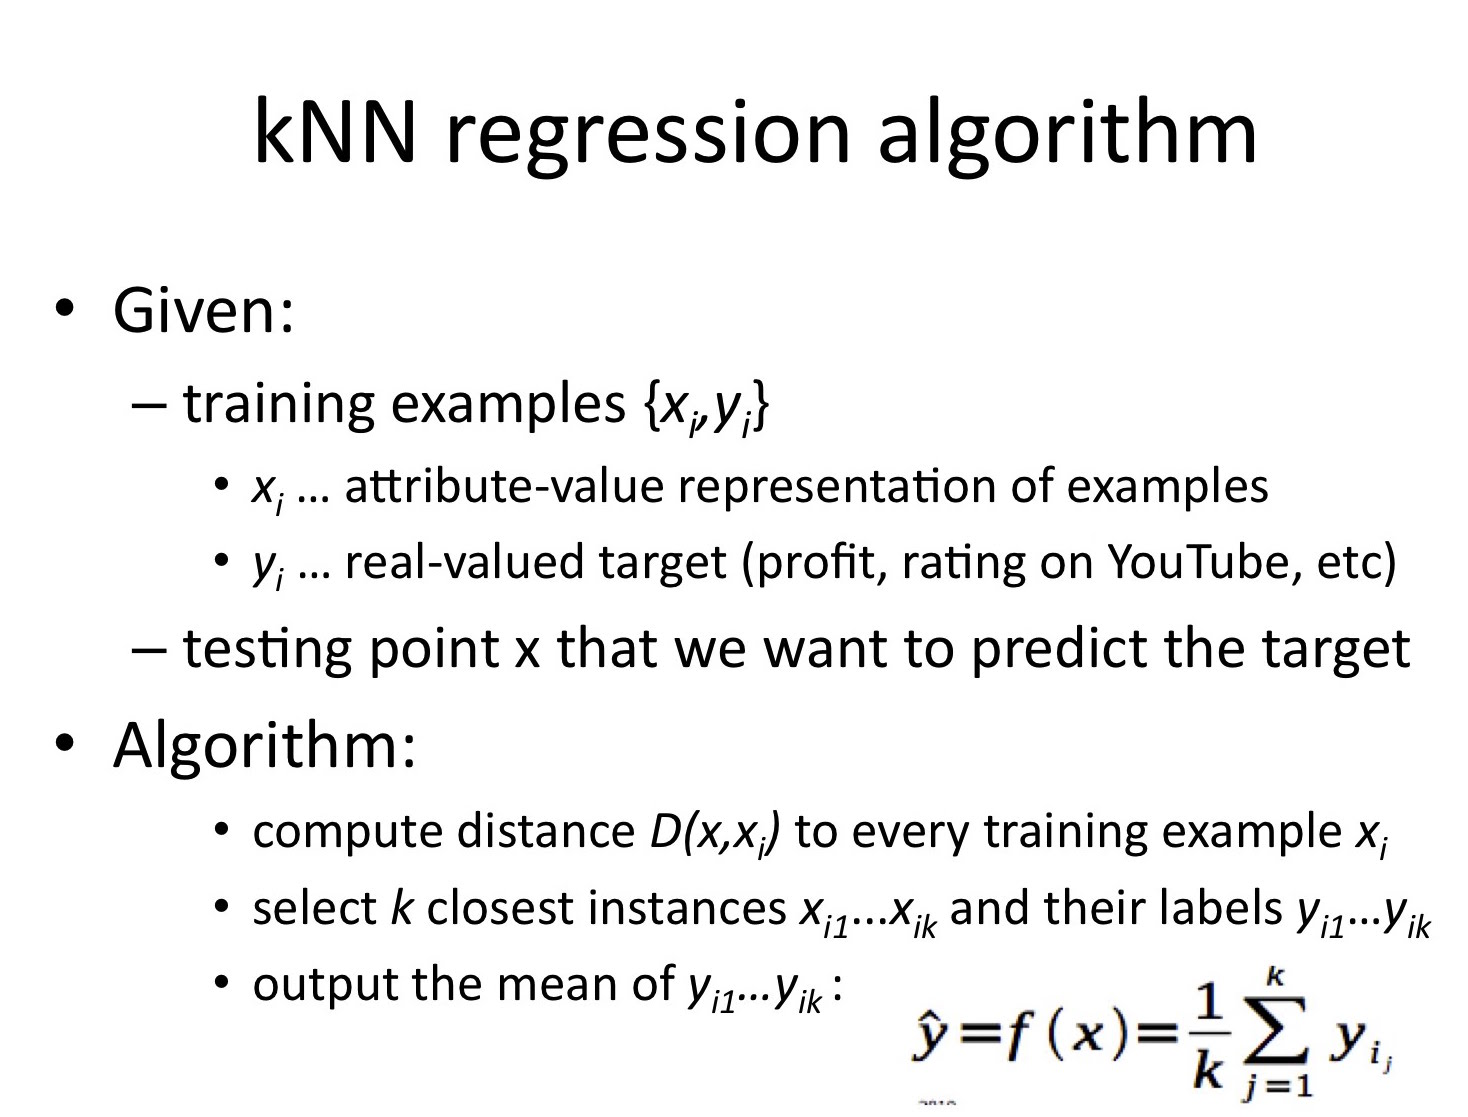

We can either apply user based or item based collaborative filtering but we decide to stick to item based collaborative system

In [27]:
algo = KNNBasic(sim_options={'user_based':False}) 

In [28]:
evaluate(algo,data,measures = ['rmse','mae'])

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9686
MAE:  0.7665
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9737
MAE:  0.7692
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9834
MAE:  0.7767
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9762
MAE:  0.7680
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9674
MAE:  0.7662
------------
------------
Mean RMSE: 0.9739
Mean MAE : 0.7693
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.9686056339313147,
                             0.9737216340640411,
                             0.9834231064546013,
                             0.9762051714014334,
                             0.9674268294705793],
                            'mae': [0.7664558126761555,
                             0.7692093153889035,
                             0.7766772096312026,
                             0.7680195798421463,
                             0.7662396964320332]})

Now we try to predict the movie rating. Lets see how we do so 

In [29]:
items[items['movie title']=='2001: A Space Odyssey (1968)']

movie_id                   movie title release date  video release date  \
134       135  2001: A Space Odyssey (1968)  01-Jan-1968                 NaN   

                                              IMDb URL  unknown  Action  \
134  http://us.imdb.com/M/title-exact?2001:%20A%20S...        0       0   

     Adventure  Animation  Children's   ...     Fantasy  Film-Noir  Horror  \
134          0          0           0   ...           0          0       0   

     Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
134        0        1        0       1         1    0        0  

[1 rows x 24 columns]

In [30]:
print (algo.predict(1, 135, 4))

user: 1          item: 135        r_ui = 4.00   est = 3.53   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


## Building a full recommender on entire data set

- Split the data to train and test
- Use the algorithm to train
- Use the test data to evaluate predictions




In [31]:
# Splitting the data set 80-20 split
trainset = data.build_full_trainset()
testSet = trainset.build_anti_testset()


In [32]:
## Train and make predictions
algo.train(trainset)
predictions = algo.test(testSet)


Computing the msd similarity matrix...
Done computing similarity matrix.


**the functions below are called helper functions and can be found in in the [website](http://surprise.readthedocs.io/en/stable/FAQ.html#how-to-get-the-top-n-recommendations-for-each-user)**

In [33]:
from collections import defaultdict

def get_top3_recommendations(predictions, topN = 3):

    top_recs = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:

        top_recs[uid].append((iid, est))
    for uid, user_ratings in top_recs.items():

        user_ratings.sort(key = lambda x: x[1], reverse = True)

        top_recs[uid] = user_ratings[:topN]
    return top_recs


In [34]:
def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and returns a
    mapping to convert raw ids into movie names.
    """
    file_name = ('../data/ml-100k//u.item')
    rid_to_name = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
    return rid_to_name

We can also find particular movie recommendations for a particular user. The answer is yes the helper functions come to our rescue. Let's see how :

In [35]:
top3_recommendations = get_top3_recommendations(predictions)
rid_to_name = read_item_names()
recommendations = list()
for uid, user_ratings in top3_recommendations.items():
    reco = [uid, [rid_to_name[iid] for (iid, _) in user_ratings]]
    recommendations.append(reco)
    #print(uid, [rid_to_name[iid] for (iid, _) in user_ratings])

df = DataFrame(recommendations,columns=['u_id','movie title'])

In [36]:
df[df['u_id']=='13']['movie title'].values

array([list(['They Made Me a Criminal (1939)', 'Lady of Burlesque (1943)', 'Crossfire (1947)'])],
      dtype=object)

Coming back to evaluation we want to know how accurate are our rating predictions. We use RMSE, as discussed above to compute the performance.

In [37]:
accuracy = surprise.accuracy.rmse(predictions)

RMSE: 0.5085


In [38]:
accuracy

0.5084906965666046

## Content based recommender systems
- Main Idea: Recommend Items to customer X similar to previous items rated highly by X

## Example

- Movie recommendations
  - Recommend movies with same actors, Directors, genres
- Websites Blogs News
  - Recommend other sites with similar content
- Given a description recommend other items with similar description 

![plan_of_action.png](../images/plan_of_action.png)

 Let's check how can we recommend clothing.

In [39]:
data = pd.read_csv('../data/sample-data.csv')

In [40]:
data.head()

id                                        description
0   1  Active classic boxers - There's a reason why o...
1   2  Active sport boxer briefs - Skinning up Glory ...
2   3  Active sport briefs - These superbreathable no...
3   4  Alpine guide pants - Skin in, climb ice, switc...
4   5  Alpine wind jkt - On high ridges, steep ice an...

We can see that that this dataset has descriptions unlike the other data sets we handled so far.

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## TF-IDF
***
TF-IDF stands for Term Frequency times Inverse document frequency. 

- TF Stands for term frequency: It tells us how often a term appears in a document. 
- IDF stands for Inverse Document Frequency: It tells us how rare it is for a document to have this term. 
  - It is calculated by inverse of how many documents have this tag divided by the total number of documents.      Generally a log of the computed value id used to bring it to scale in which can be used. 

- Then we multiply the TF and IDF to to get a weight which is assigned to a particular search term we are looking for. 



With the newly gained knowledge in hand we can compute [TF-IDF](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). He decides to take the following steps
- Create a TF-IDF matrix of unigrams, bigrams, and trigrams
  for each product and remove the common words such as and the etc. 

- Then compute similarity between all products using
  SciKit Learn's linear_kernel (which in this case is
  equivalent to cosine similarity).

- Iterate through each item's similar items and store the
  100 most-similar. Here he stops at hundred otherwise the list could get too large
  
- Similarities and their scores are stored in redis as a
  Sorted Set, with one set for each item.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [42]:
tf = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 3),
                             min_df=0,
                             stop_words='english')
tfidf_matrix = tf.fit_transform(data['description'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

for idx, row in data.iterrows():
            similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
            similar_items = [(cosine_similarities[idx][i], data['id'][i])
                             for i in similar_indices]

            flattened = sum(similar_items[1:],())



The sum returns a list of tuples into a single tuple: This single tuple has similarities and item id. This is shown below thus retrieving the id and similarities and sorting them would enable us to recommend clothing.

In [43]:
similarities = list()
item_id = list()

for i in range(0,len(flattened),2): 
    similarities.append(flattened[i]) # Collecting similarity scores and 
    item_id.append(flattened[i-1])

sol = DataFrame({'id':item_id,'similarities':similarities})
predictions = sol.merge(data,how='inner',on='id')[:10] # using merge to get description

After sorting one can clearly view the predictions. Now these predictions are totally based on the content in the description.   

In [44]:
predictions

id  similarities                                        description
0  315      0.362816  Kite town t-shirt - Artist Chris Del Moro tran...
1  499      0.318046  All-wear cargo shorts - All-Wear Cargo Shorts ...
2  462      0.317783  Custodian pants - reg - The graveyard shift ha...
3  463      0.315561  Custodian pants - short - The graveyard shift ...
4   32      0.256629  Custodian pants - long - The graveyard shift h...
5   34      0.234255  Delivery shorts - Locals know all the best spo...
6  483      0.216608  Duck shorts - Sometimes life requires a welder...
7  303      0.201515  All-wear capris - Capris are more discreet tha...
8  482      0.201159  Duck pants - short - Essential wear for splitt...
9  481      0.199110  Duck pants - reg - Essential wear for splittin...

**In class Question** looking at the similarity scores and the method used what do you think should be the range of the scores?

<img src="../images/icon/Recap.png" alt="In Session Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

## In class recap
***
- What is Recommendation System
- The long tail
- A simple Popularity based Recommender system
- A Collaborative Filtering Model
- Evaluating a Recommendation system

## Thank You

For more queries - Reach out to academics@greyatom.com